### Importar Bibliotecas

In [0]:

# !apt-get update --fix-missing

# !apt-get install python-dev libxml2-dev libxslt1-dev antiword unrtf poppler-utils pstotext tesseract-ocr flac ffmpeg lame libmad0 libsox-fmt-mp3 sox libjpeg-dev swig
  
# !apt-get install libpulse-dev
# !pip install textract

In [3]:
import textract
import urllib
import matplotlib.pyplot as plt
import pandas as pd 
import operator
import nltk
import numpy as np
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Inserir 'é' nas Stopwords

In [0]:
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords.append('é')

### Salvar o arquivo localmente

In [5]:
urlPlanoDeGovernoHaddad = "http://divulgacandcontas.tse.jus.br/candidaturas/oficial/2018/BR/BR/2022802018/280000629808/proposta_1536702143353.pdf"
urlPlanoDeGovernoBolsonaro = 'http://divulgacandcontas.tse.jus.br/candidaturas/oficial/2018/BR/BR/2022802018/280000614517/proposta_1534284632231.pdf'

testfile = urllib.request.URLopener()

testfile.retrieve(urlPlanoDeGovernoHaddad , "planoDeGovernoHaddad.pdf")
testfile.retrieve(urlPlanoDeGovernoBolsonaro, "planoDeGovernoBolsonaro.pdf")

('planoDeGovernoBolsonaro.pdf', <http.client.HTTPMessage at 0x7faf05836b00>)

### Converter o PDF para texto

In [0]:
textoCruPlanoDeGovernoHaddad = textract.process("planoDeGovernoHaddad.pdf")
textoCruPlanoDeGovernoBolsonaro = textract.process("planoDeGovernoBolsonaro.pdf")

### Decodificar o texto para caracteres reconhecíveis

In [0]:
textoDecodificado_Haddad = textoCruPlanoDeGovernoHaddad.decode("utf_8").lower().split()
textoDecodificado_Bolsonaro = textoCruPlanoDeGovernoBolsonaro.decode("utf_8").lower().split()

### Tratamento de palavras cognatas

In [0]:
def normalizacaoDeCognatos(texto):
  for i, word in enumerate(texto):
    if (word == "mulheres"):
      texto[i] = "mulher"
      
    elif(word == "idosos"):
      texto[i] = "idoso"
      
    elif (word == "crianças"):
      texto[i] = "criança"
      
    elif (word == "negros" or word == "negra" or word == "negras"):
      texto[i] = "negro"
      
    elif (word == "culturas" or word == "culturais"):
      texto[i] = "cultura" 
      
    elif (word == "política" or word == "políticas"):
      texto[i] = "política"
      
  return texto


textoDecodificado_Haddad = normalizacaoDeCognatos(textoDecodificado_Haddad)
textoDecodificado_Bolsonaro = normalizacaoDeCognatos(textoDecodificado_Bolsonaro)
      
      

### Remover as Stopwords e gerar um dicionário de frequência das palavras restantes

In [0]:
textoSemStopwords_Haddad = [word for word in textoDecodificado_Haddad if word not in stopwords]
textoSemStopwords_Bolsonaro = [word for word in textoDecodificado_Bolsonaro  if word not in stopwords]

frequenciaDePalavras_Haddad = {}

for word in textoSemStopwords_Haddad:
  if word in frequenciaDePalavras_Haddad.keys():
    frequenciaDePalavras_Haddad[word] += 1
  else:
    frequenciaDePalavras_Haddad[word] = 1
    
  
frequenciaDePalavras_Bolsonaro = {}

for word in textoSemStopwords_Bolsonaro:
  if word in frequenciaDePalavras_Bolsonaro.keys():
    frequenciaDePalavras_Bolsonaro[word] += 1
  else:
    frequenciaDePalavras_Bolsonaro[word] = 1

### Criamos uma Série com o dicionário, e ordenamos

In [0]:
series_Haddad = pd.Series(frequenciaDePalavras_Haddad).sort_values(ascending=False)

series_Bolsonaro = pd.Series(frequenciaDePalavras_Bolsonaro).sort_values(ascending=False)


### Pegamos as 20 palavras mais frequentes e geramos o gráfico

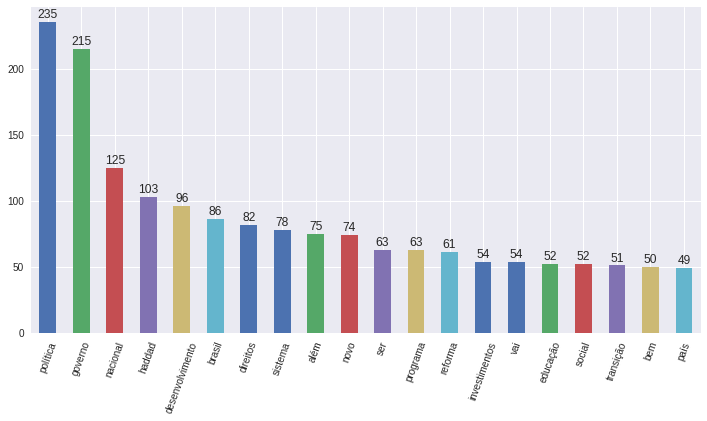

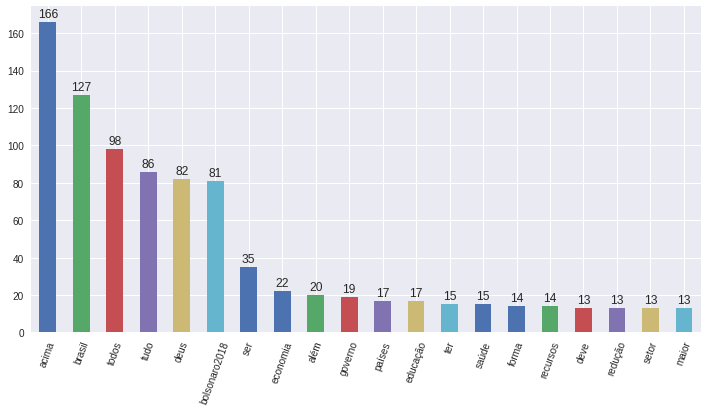

In [26]:
#Haddad

data_Haddad = series_Haddad[0:20]

x_labels = data_Haddad.index 
y_labels = data_Haddad.values 
plt.figure(figsize=(12, 6))
ax = pd.Series(y_labels).plot(kind='bar')
ax.set_xticklabels(x_labels)
# ax.set_ylim(ymin=0, ymax=200)
plt.xticks(rotation=70)
rects = ax.patches
for rect, label in zip(rects, y_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 1, label, ha='center', va='bottom')
    
    
    
#Bolsonaro    
data_Bolsonaro = series_Bolsonaro[0:6]
data_Bolsonaro = data_Bolsonaro.append(series_Bolsonaro[7:21])

x_labels = data_Bolsonaro.index 
y_labels = data_Bolsonaro.values 
plt.figure(figsize=(12, 6))
ax = pd.Series(y_labels).plot(kind='bar')
ax.set_xticklabels(x_labels)
# ax.set_ylim(ymin=0, ymax=200)
plt.xticks(rotation=70)
rects = ax.patches
for rect, label in zip(rects, y_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 1, label, ha='center', va='bottom')

### Pegamos as 20 palavras mais frequentes em proporção e geramos o gráfico

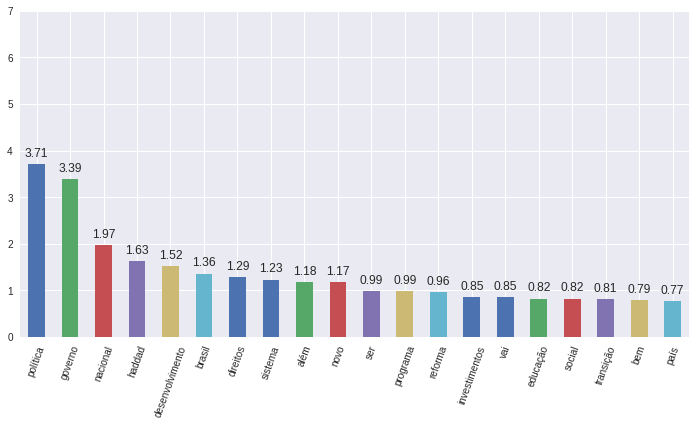

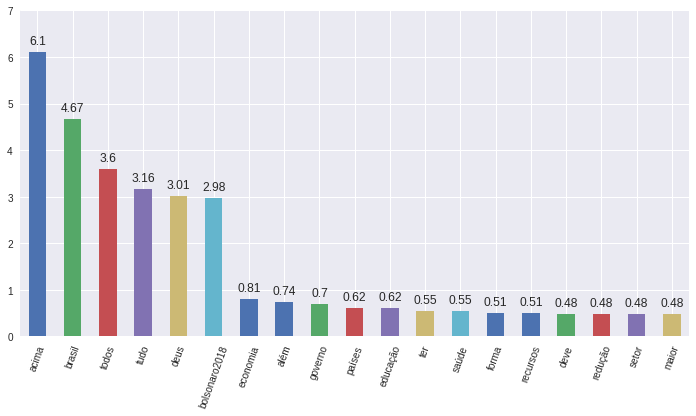

In [15]:
#Haddad

data_Haddad_prop = data_Haddad[0:20] / len(series_Haddad) * 100

x_labels = data_Haddad_prop.index 
y_labels = np.around(data_Haddad_prop.values, decimals=2)
plt.figure(figsize=(12, 6))
ax = pd.Series(y_labels).plot(kind='bar')
ax.set_xticklabels(x_labels)
ax.set_ylim(ymin=0, ymax=7)
plt.xticks(rotation=70)
rects = ax.patches
for rect, label in zip(rects, y_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.1, label, ha='center', va='bottom')
    
    
    
#Bolsonaro    
data_Bolsonaro_prop = data_Bolsonaro[0:6] / (len(series_Bolsonaro)-1) * 100
data_Bolsonaro_prop = data_Bolsonaro_prop.append(data_Bolsonaro[7:21] / (len(series_Bolsonaro)-1) * 100)

x_labels = data_Bolsonaro_prop.index 
y_labels = np.around(data_Bolsonaro_prop.values, decimals=2)
plt.figure(figsize=(12, 6))
ax = pd.Series(y_labels).plot(kind='bar')
ax.set_xticklabels(x_labels)
ax.set_ylim(ymin=0, ymax=7)
plt.xticks(rotation=70)
rects = ax.patches
for rect, label in zip(rects, y_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.1, label , ha='center', va='bottom')

### A frequência de fala sobre termos específicos 



/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:705: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


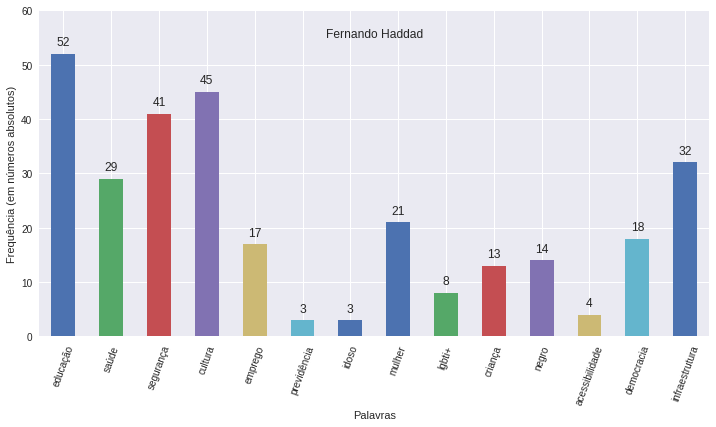

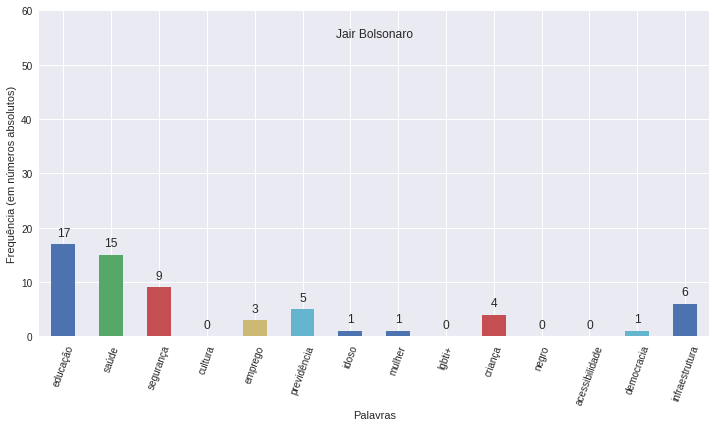

In [13]:
topicosEspecificos = ['educação','saúde','segurança','cultura','emprego','previdência', 'idoso','mulher','lgbti+','criança', 'negro', 'acessibilidade','democracia','infraestrutura']



#Haddad
new_data = series_Haddad[topicosEspecificos].fillna(0).astype(int)  
x_labels = new_data.index
y_labels = new_data.values
plt.figure(figsize=(12, 6))
plt.title("Fernando Haddad", y=0.9)
ax = pd.Series(y_labels).plot(kind='bar')
ax.set_xticklabels(x_labels)
ax.set_ylim(ymin=0, ymax=60)
ax.set_xlabel('Palavras')
ax.set_ylabel('Frequência (em números absolutos)')
plt.xticks(rotation=70)

rects = ax.patches

for rect, label in zip(rects, y_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 1, label, ha='center', va='bottom')
  
  
  
#Bolsonaro
new_data = series_Bolsonaro[topicosEspecificos].fillna(0).astype(int) 
x_labels = new_data.index
y_labels = new_data.values
plt.figure(figsize=(12, 6))
plt.title("Jair Bolsonaro", y=0.9)
ax = pd.Series(y_labels).plot(kind='bar')
ax.set_xticklabels(x_labels)
ax.set_ylim(ymin=0, ymax=60)
ax.set_xlabel('Palavras')
ax.set_ylabel('Frequência (em números absolutos)')
plt.xticks(rotation=70)

rects = ax.patches

for rect, label in zip(rects, y_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 1, label, ha='center', va='bottom')



### A frequência de fala sobre termos específicos em números relativos



/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:705: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


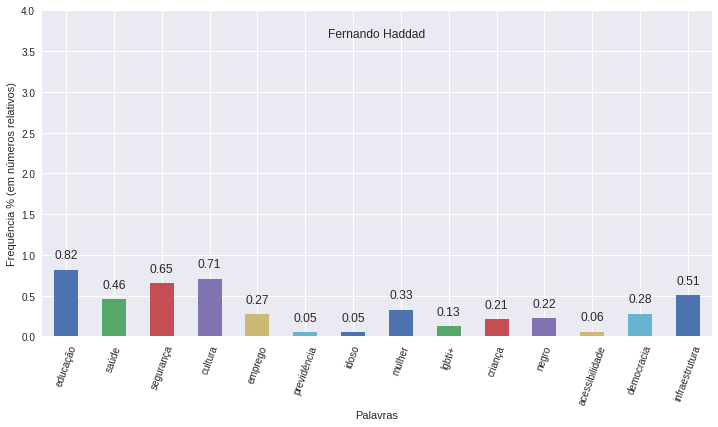

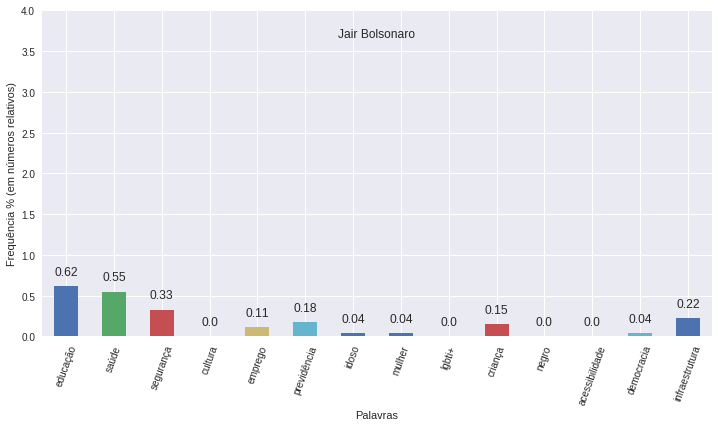

In [20]:
topicosEspecificos = ['educação','saúde','segurança','cultura','emprego','previdência', 'idoso','mulher','lgbti+','criança', 'negro', 'acessibilidade','democracia','infraestrutura']



#Haddad
new_data = series_Haddad[topicosEspecificos].fillna(0).astype(int)  
x_labels = new_data.index
y_labels = np.round(new_data.values / len(series_Haddad) * 100, decimals=2)
plt.figure(figsize=(12, 6))
plt.title("Fernando Haddad", y=0.9)
ax = pd.Series(y_labels).plot(kind='bar')
ax.set_xticklabels(x_labels)
ax.set_ylim(ymin=0, ymax=4)
ax.set_xlabel('Palavras')
ax.set_ylabel('Frequência % (em números relativos)')
plt.xticks(rotation=70)

rects = ax.patches

for rect, label in zip(rects, y_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.1, label, ha='center', va='bottom')
  
  
  
#Bolsonaro
new_data = series_Bolsonaro[topicosEspecificos].fillna(0).astype(int) 
x_labels = new_data.index
y_labels = np.round(new_data.values / len(series_Bolsonaro) * 100, decimals=2)
plt.figure(figsize=(12, 6))
plt.title("Jair Bolsonaro", y=0.9)
ax = pd.Series(y_labels).plot(kind='bar')
ax.set_xticklabels(x_labels)
ax.set_ylim(ymin=0, ymax=4)
ax.set_xlabel('Palavras')
ax.set_ylabel('Frequência % (em números relativos)')
plt.xticks(rotation=70)

rects = ax.patches

for rect, label in zip(rects, y_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.1, label, ha='center', va='bottom')



## Twitter

In [0]:
import tweepy
from tweepy import OAuthHandler

In [0]:
consumer_key_value = '***'
consumer_secret_value = '***'
access_token_key_value = '***'
access_token_secret_value = '***'

In [0]:
auth = OAuthHandler(consumer_key_value, consumer_secret_value)
auth.set_access_token(access_token_key_value, access_token_secret_value)

In [0]:
api = tweepy.API(auth)

### Pega todos os Tweets a partir de 8 de Outubro

In [0]:
tweets_Haddad = []
tweets_Bolsonaro = []

#Tweet Haddad: 1049341310098972673
#Tweet Bolsonaro: 1049347910490574848

pageIndex = 0
collection = []
while collection != [] or pageIndex == 0:
    collection = api.user_timeline(id='Haddad_Fernando', tweet_mode='extended', since_id=1049341310098972673, page=pageIndex)
    if collection != []:
      tweets_Haddad.extend(collection)
    pageIndex += 1


pageIndex = 0
collection = []
while collection != [] or pageIndex == 0:
    collection = api.user_timeline(id='jairbolsonaro', tweet_mode='extended', since_id=1049347910490574848, page=pageIndex)
    if collection != []:
      tweets_Bolsonaro.extend(collection)
    pageIndex += 1

    

### Lista de Palavras dos Tweets

In [0]:
statuses_text_Haddad = []
statuses_text_Bolsonaro = []

for status in tweets_Haddad:
  statuses_text_Haddad.extend(status.full_text.split(' '))
  
statuses_text_Haddad = list(map(lambda x: x.lower(),statuses_text_Haddad))



for status in tweets_Bolsonaro:
  statuses_text_Bolsonaro.extend(status.full_text.split(' '))
  
statuses_text_Bolsonaro = list(map(lambda x: x.lower(),statuses_text_Bolsonaro))



### Trata cognatos nos tweets

In [0]:
def normalizacaoDeCognatos(texto):
  for i, word in enumerate(texto):
    if (word == "mulheres"):
      texto[i] = "mulher"
      
    elif(word == "idosos"):
      texto[i] = "idoso"
      
    elif (word == "crianças"):
      texto[i] = "criança"
      
    elif (word == "negros" or word == "negra" or word == "negras"):
      texto[i] = "negro"
      
    elif (word == "culturas" or word == "culturais"):
      texto[i] = "cultura" 
      
  return texto

statuses_text_Haddad = normalizacaoDeCognatos(statuses_text_Haddad)
statuses_text_Bolsonaro = normalizacaoDeCognatos(statuses_text_Bolsonaro)

### Exclui stopwords das listas de palavras e gera dicionários de frequência

In [0]:
statuses_text_Haddad = [word for word in statuses_text_Haddad if word not in stopwords]
statuses_text_Bolsonaro = [word for word in statuses_text_Bolsonaro  if word not in stopwords]

#Haddad
frequenciaDePalavrasEmTweets_Haddad = {}

for word in statuses_text_Haddad:
  if word in frequenciaDePalavrasEmTweets_Haddad.keys():
    frequenciaDePalavrasEmTweets_Haddad[word] += 1
  else:
    frequenciaDePalavrasEmTweets_Haddad[word] = 1
    

#Bolsonaro
frequenciaDePalavrasEmTweets_Bolsonaro = {}

for word in statuses_text_Bolsonaro:
  if word in frequenciaDePalavrasEmTweets_Bolsonaro.keys():
    frequenciaDePalavrasEmTweets_Bolsonaro[word] += 1
  else:
    frequenciaDePalavrasEmTweets_Bolsonaro[word] = 1

### Criamos uma Série e ordenamos por frequência

In [0]:
seriesTweets_Haddad = pd.Series(frequenciaDePalavrasEmTweets_Haddad).sort_values(ascending=False)

seriesTweets_Bolsonaro = pd.Series(frequenciaDePalavrasEmTweets_Bolsonaro).sort_values(ascending=False)


### 20 palavras mais usadas no Twitter

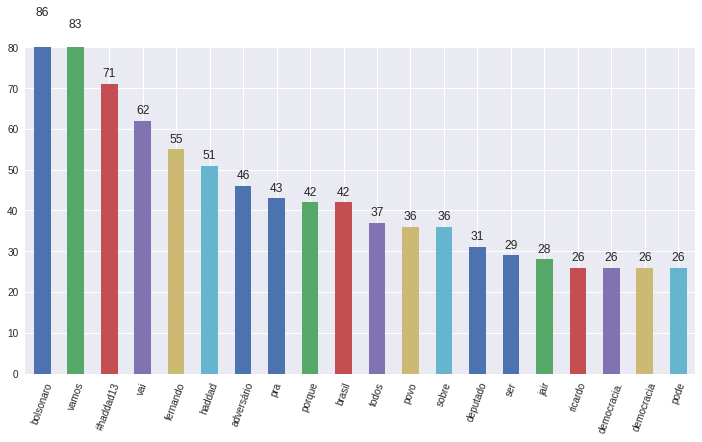

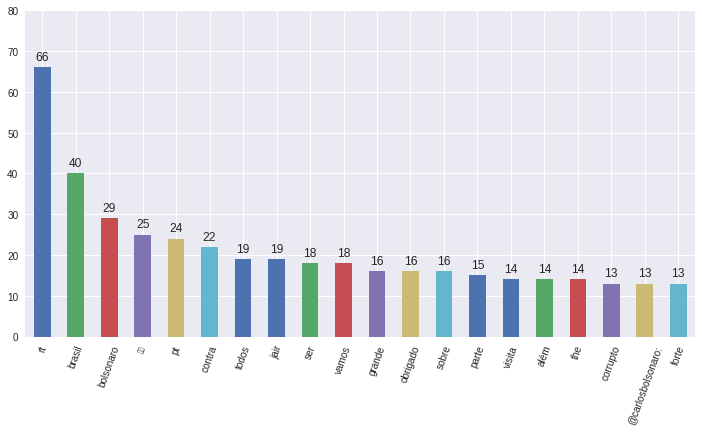

In [0]:
#Haddad

data_Haddad = seriesTweets_Haddad[0:20] #Primeira é 'é'

x_labels = data_Haddad.index 
y_labels = data_Haddad.values 
plt.figure(figsize=(12, 6))
ax = pd.Series(y_labels).plot(kind='bar')
ax.set_xticklabels(x_labels)
ax.set_ylim(ymin=0, ymax=80)
plt.xticks(rotation=70)
rects = ax.patches
for rect, label in zip(rects, y_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 1, label, ha='center', va='bottom')
    
    
    
#Bolsonaro    
data_Bolsonaro = seriesTweets_Bolsonaro[0:20]

x_labels = data_Bolsonaro.index 
y_labels = data_Bolsonaro.values 
plt.figure(figsize=(12, 6))
ax = pd.Series(y_labels).plot(kind='bar')
ax.set_xticklabels(x_labels)
ax.set_ylim(ymin=0, ymax=80)
plt.xticks(rotation=70)
rects = ax.patches
for rect, label in zip(rects, y_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 1, label, ha='center', va='bottom')

### Assuntos Específicos

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:705: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


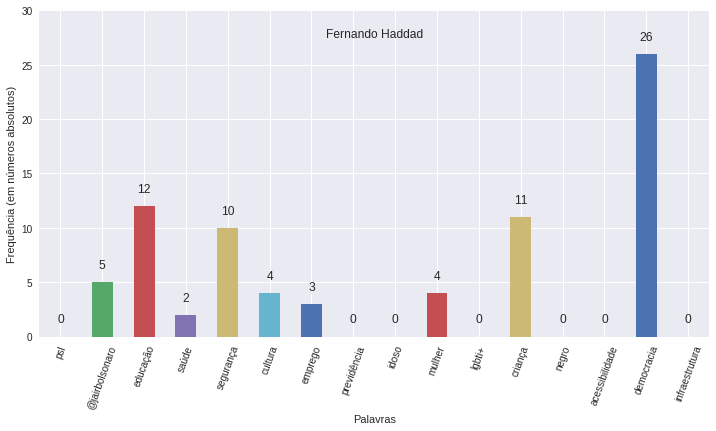

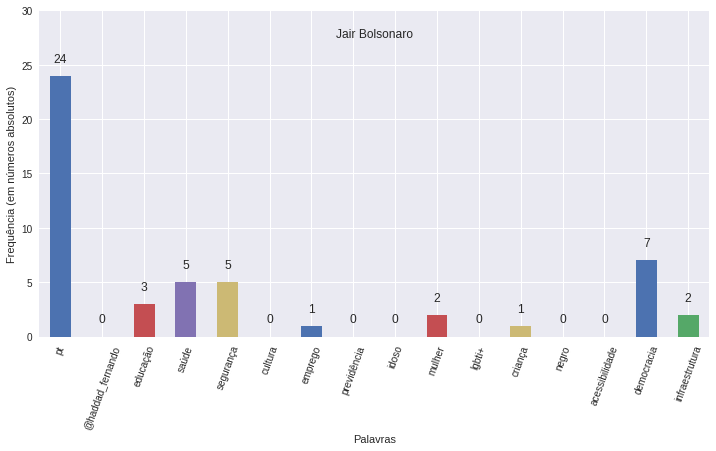

In [0]:
topicosEspecificos = ['educação','saúde','segurança','cultura','emprego','previdência', 'idoso','mulher','lgbti+','criança', 'negro', 'acessibilidade','democracia','infraestrutura']



#Haddad
new_data = seriesTweets_Haddad[['psl', '@jairbolsonaro'] + topicosEspecificos].fillna(0).astype(int)  
x_labels = new_data.index
y_labels = new_data.values
plt.figure(figsize=(12, 6))
plt.title("Fernando Haddad", y=0.9)
ax = pd.Series(y_labels).plot(kind='bar')
ax.set_xticklabels(x_labels)
ax.set_ylim(ymin=0, ymax=30)
ax.set_xlabel('Palavras')
ax.set_ylabel('Frequência (em números absolutos)')
plt.xticks(rotation=70)

rects = ax.patches

for rect, label in zip(rects, y_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 1, label, ha='center', va='bottom')
  
  
  
#Bolsonaro
new_data = seriesTweets_Bolsonaro[['pt','@haddad_fernando'] + topicosEspecificos].fillna(0).astype(int) 
x_labels = new_data.index
y_labels = new_data.values
plt.figure(figsize=(12, 6))
plt.title("Jair Bolsonaro", y=0.9)
ax = pd.Series(y_labels).plot(kind='bar')
ax.set_xticklabels(x_labels)
ax.set_ylim(ymin=0, ymax=30)
ax.set_xlabel('Palavras')
ax.set_ylabel('Frequência (em números absolutos)')
plt.xticks(rotation=70)

rects = ax.patches

for rect, label in zip(rects, y_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 1, label, ha='center', va='bottom')

